In [12]:
import pandas as pd
import numpy as np

In [13]:
# Data Loading
file_path = '2018_clean_final.csv'
flight_df = pd.read_csv(file_path, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513116 entries, 0 to 4513115
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   CRS_DEP_TIME         int64  
 3   DEP_DELAY            float64
 4   TAXI_OUT             float64
 5   WHEELS_OFF           float64
 6   WHEELS_ON            float64
 7   TAXI_IN              float64
 8   CRS_ARR_TIME         int64  
 9   ARR_DELAY            float64
 10  CRS_ELAPSED_TIME     float64
 11  ACTUAL_ELAPSED_TIME  float64
 12  AIR_TIME             float64
 13  DISTANCE             float64
 14  CARRIER_DELAY        float64
 15  WEATHER_DELAY        float64
 16  NAS_DELAY            float64
 17  SECURITY_DELAY       float64
 18  LATE_AIRCRAFT_DELAY  float64
 19  Org_Airport          object 
 20  Org_latitude         float64
 21  Org_longitude        float64
 22  Origin_city          object 
 23  Dest_Airport         object 
 24

In [15]:
flight_df.shape

(4513116, 31)

In [16]:
flight_df.isnull().sum()


FL_DATE                0
OP_CARRIER             0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               1
CARRIER_DELAY          1
WEATHER_DELAY          1
NAS_DELAY              1
SECURITY_DELAY         1
LATE_AIRCRAFT_DELAY    1
Org_Airport            1
Org_latitude           1
Org_longitude          1
Origin_city            1
Dest_Airport           1
Dest_latitude          1
Dest_longitude         1
Dest_city              1
month                  1
Day                    1
MONTH_abbr             1
DELAY_STATUS           1
dtype: int64

In [17]:
flight_df = flight_df.dropna()

In [18]:
flight_df.isnull().sum()

FL_DATE                0
OP_CARRIER             0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Org_Airport            0
Org_latitude           0
Org_longitude          0
Origin_city            0
Dest_Airport           0
Dest_latitude          0
Dest_longitude         0
Dest_city              0
month                  0
Day                    0
MONTH_abbr             0
DELAY_STATUS           0
dtype: int64

In [19]:
flight_df['FL_DATE'] = pd.to_datetime(flight_df['FL_DATE'])
flight_df['WEEKDAY'] = flight_df['FL_DATE'].dt.dayofweek
flight_df.columns

Index(['FL_DATE', 'OP_CARRIER', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Org_Airport', 'Org_latitude', 'Org_longitude',
       'Origin_city', 'Dest_Airport', 'Dest_latitude', 'Dest_longitude',
       'Dest_city', 'month', 'Day', 'MONTH_abbr', 'DELAY_STATUS', 'WEEKDAY'],
      dtype='object')

In [20]:
flight_df.WEEKDAY.value_counts()

0    678073
4    671580
3    666992
2    650610
1    644023
6    643218
5    558619
Name: WEEKDAY, dtype: int64

In [21]:
flight_df.head(2)

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Org_Airport,Org_latitude,Org_longitude,Origin_city,Dest_Airport,Dest_latitude,Dest_longitude,Dest_city,month,Day,MONTH_abbr,DELAY_STATUS,WEEKDAY
0,2018-01-01,United Airlines,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
1,2018-01-01,United Airlines,1657,161.0,14.0,1952.0,2130.0,7.0,1925,132.0,268.0,239.0,218.0,1605.0,16.0,0.0,0.0,0.0,116.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,1.0,0


In [22]:
flight_df['CRS_DEP_TIME'] = np.ceil(flight_df['CRS_DEP_TIME']/600).apply(int)
flight_df['WHEELS_OFF'] = np.ceil(flight_df['WHEELS_OFF']/600).apply(int) 
flight_df['WHEELS_ON'] = np.ceil(flight_df['WHEELS_ON']/600).apply(int)
flight_df['CRS_ARR_TIME'] = np.ceil(flight_df['CRS_ARR_TIME']/600).apply(int)

In [24]:
flight_df.CRS_DEP_TIME.value_counts(normalize=True)

2    0.381917
3    0.357840
4    0.207097
1    0.053145
Name: CRS_DEP_TIME, dtype: float64

In [25]:
flight_df.CRS_ARR_TIME.value_counts(normalize=True)

3    0.349401
4    0.323945
2    0.297947
1    0.028708
Name: CRS_ARR_TIME, dtype: float64

In [26]:
flight_df.head()

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Org_Airport,Org_latitude,Org_longitude,Origin_city,Dest_Airport,Dest_latitude,Dest_longitude,Dest_city,month,Day,MONTH_abbr,DELAY_STATUS,WEEKDAY
0,2018-01-01,United Airlines,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
1,2018-01-01,United Airlines,3,161.0,14.0,4,4,7.0,4,132.0,268.0,239.0,218.0,1605.0,16.0,0.0,0.0,0.0,116.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,1.0,0
2,2018-01-01,United Airlines,1,-1.0,14.0,2,2,6.0,2,-23.0,275.0,253.0,233.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
3,2018-01-01,United Airlines,4,11.0,26.0,4,4,12.0,4,-2.0,271.0,258.0,220.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
4,2018-01-01,United Airlines,2,-1.0,13.0,3,3,7.0,3,-18.0,268.0,251.0,231.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0


In [27]:
flight_df = flight_df.drop(['MONTH_abbr'], axis=1)
flight_df = flight_df.drop(['Day'], axis=1)
flight_df = flight_df.drop(['Dest_city'], axis=1)
flight_df = flight_df.drop(['Origin_city'], axis=1)
flight_df = flight_df.drop(['FL_DATE'], axis=1)
flight_df = flight_df.drop(['Dest_Airport'], axis=1)
flight_df = flight_df.drop(['Org_Airport'], axis=1)
flight_df = flight_df.drop(['Dest_latitude'], axis=1)
flight_df = flight_df.drop(['Dest_longitude'], axis=1)
flight_df = flight_df.drop(['Org_latitude'], axis=1)
flight_df = flight_df.drop(['Org_longitude'], axis=1)
flight_df = flight_df.drop(['month'], axis=1)
flight_df = flight_df.drop(['WEEKDAY'], axis=1)



In [28]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4513115 entries, 0 to 4513114
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OP_CARRIER           object 
 1   CRS_DEP_TIME         int64  
 2   DEP_DELAY            float64
 3   TAXI_OUT             float64
 4   WHEELS_OFF           int64  
 5   WHEELS_ON            int64  
 6   TAXI_IN              float64
 7   CRS_ARR_TIME         int64  
 8   ARR_DELAY            float64
 9   CRS_ELAPSED_TIME     float64
 10  ACTUAL_ELAPSED_TIME  float64
 11  AIR_TIME             float64
 12  DISTANCE             float64
 13  CARRIER_DELAY        float64
 14  WEATHER_DELAY        float64
 15  NAS_DELAY            float64
 16  SECURITY_DELAY       float64
 17  LATE_AIRCRAFT_DELAY  float64
 18  DELAY_STATUS         float64
dtypes: float64(14), int64(4), object(1)
memory usage: 688.6+ MB


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Label encoding features to change categorical variables into numerical one
flight_df['OP_CARRIER'] = le.fit_transform(flight_df['OP_CARRIER'])


In [30]:
flight_df.head(2)



,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_STATUS
0,16,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,3,161.0,14.0,4,4,7.0,4,132.0,268.0,239.0,218.0,1605.0,16.0,0.0,0.0,0.0,116.0,1.0


In [31]:
flight_df['DELAY_STATUS'] = flight_df['DELAY_STATUS'].astype(int)

In [32]:
X = flight_df.drop(['DELAY_STATUS','ARR_DELAY','DEP_DELAY'], axis = 1)
X.shape

(4513115, 16)

In [33]:
y = flight_df['DELAY_STATUS']
y.head(20)

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
Name: DELAY_STATUS, dtype: int64

In [34]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import EasyEnsembleClassifier


# Perform the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

**Decision Tree Classifier**



In [35]:
# Build a regular tree as baseline
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth= 5, class_weight="balanced")
tree_clf.fit(X_train, y_train)




# Test set predictions
pred = tree_clf.predict(X_test)



print('Testing Accuracy for Decision Tree Classifier:', accuracy_score(y_test, pred))





Testing Accuracy for Decision Tree Classifier: 0.7977465683359984


In [36]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.82      0.87      0.84    849354
           1       0.76      0.68      0.71    504581

    accuracy                           0.80   1353935
   macro avg       0.79      0.77      0.78   1353935
weighted avg       0.80      0.80      0.80   1353935



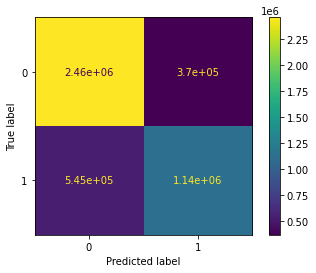

In [39]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf, X, y , values_format='.3g')
plt.show()

In [40]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 20))
    plt.barh(range(n_features), model.feature_importances_, color='k', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.grid(True)





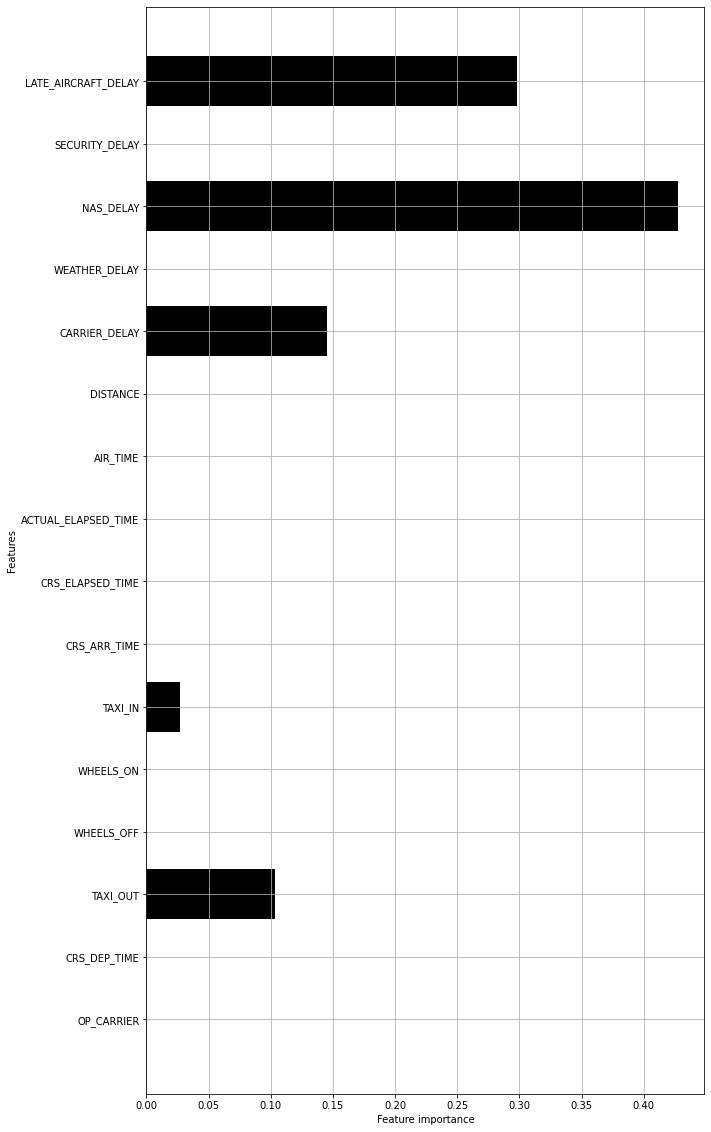

In [41]:
plot_feature_importances(tree_clf)
plt.rcParams["figure.facecolor"] = "lightblue"

**Bagging Classifier**

In [45]:
# instantiating the BaggingClassifire
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)


# Now to fitting the training data:
bagged_tree.fit(X_train, y_train)



bagged_tree.score(X_train, y_train)
bagged_tree.score(X_test, y_test)
# Test set predictions
pred = bagged_tree.predict(X_test)
print('Testing Accuracy for Bagging Classifire :', accuracy_score(y_test, pred))


Testing Accuracy for Bagging Classifire : 0.8203983204511295


In [46]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.79      0.98      0.87    849354
           1       0.93      0.56      0.70    504581

    accuracy                           0.82   1353935
   macro avg       0.86      0.77      0.79   1353935
weighted avg       0.84      0.82      0.81   1353935



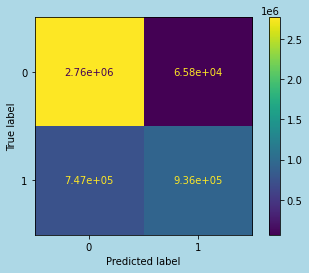

In [47]:
# Alternative confusion matrix
plot_confusion_matrix(bagged_tree, X, y, values_format='.3g')
plt.show()